# Chapter 6: SAT Problem
### Qiskit 1.0 (0.46)

A decision problem, like the SAT-problem, is a computational problem with instances formulated as a question with a binary Yes or No answer.
We apply Grover's amplification to a marked state of three qubits. 
Our solution corresponds to the Boolean formula 
\begin{equation}
\phi=(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2) \wedge \neg x_3
\end{equation}
that evaluates true, which is the case for $x_1=1$, $x_2=1$ and $x_3=0$. In this case,  the state  determined by the oracle function with the solution  encoded by  $ (-1)^{o(x)}$.

The operation $( x_1 \wedge x_2) $ is represented by  the $AND$ operation, the ancilla  qubit $2$ is set to $0$, $x_1$ is represented by qubit $0$ and $x_2$ by qubit $1$ 

$ccX(x_0,x_1,0)=(x_0,x_2, x_1 \wedge x_2) $

In [1]:

from qiskit import QuantumCircuit,QuantumRegister
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.circuit.library import MCXGate
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(6)

#Input represented by qubits 0,1,4

#First And, qubit 2 is zero
qc.ccx(0,1,2)
qc.barrier()

and the result of the operation is represented in the qubit $2$.


The operation $ (x_1 \leftrightarrow x_2)$ is represented by  the $XOR$ and $NOT$ operation, the  bit $ x_1$ is set to $1$ corresponding to the qubit $3$.
The $XOR$ operation is executed $ccX(1,x_2,x_3)=(1,x_2, x_2 \oplus x_3)$, 

In [2]:
qc.x(3)
qc.ccx(3,0,1)

the result of the  $XOR$  operation is written in qubit $1$, then the  $NOT$ operation is performed

In [3]:
qc.x(3)
qc.ccx(3,0,1)
qc.x(1)

and the result of the operation is represented in the qubit $1$.
We execute the  $AND$ operation of the result represented in the qubit $1$ and $2$ and write the result in qubit $3$. We reset the qubit $3$ to zero

In [4]:
qc.x(3)
qc.ccx(1,2,3)

and write result of the operation  in the qubit $3$, which corresponds to the Boolean formula $(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2)$. The remaining part of the formula is represented by $NOT$ and $AND$ operation of $\neg x_3$ represented by qubit $4$

In [5]:
qc.barrier()
qc.x(4)
qc.ccx(3,4,5)

and write result of the operation  in the qubit $5$, resulting in 

In [6]:
qc.draw()

░                                ░           
q_0: ──■───░────────■─────────■─────────────░───────────
       │   ░      ┌─┴─┐     ┌─┴─┐┌───┐      ░           
q_1: ──■───░──────┤ X ├─────┤ X ├┤ X ├──■───░───────────
     ┌─┴─┐ ░      └─┬─┘     └─┬─┘└───┘  │   ░           
q_2: ┤ X ├─░────────┼─────────┼─────────■───░───────────
     └───┘ ░ ┌───┐  │  ┌───┐  │  ┌───┐┌─┴─┐ ░           
q_3: ──────░─┤ X ├──■──┤ X ├──■──┤ X ├┤ X ├─░────────■──
           ░ └───┘     └───┘     └───┘└───┘ ░ ┌───┐  │  
q_4: ──────░────────────────────────────────░─┤ X ├──■──
           ░                                ░ └───┘┌─┴─┐
q_5: ──────░────────────────────────────────░──────┤ X ├
           ░                                ░      └───┘

The circuit representing the Boolean formula 
$\phi=(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2) \wedge \neg x_3$. The input are the qubits $0$, $1$ and $4$ and the output is represented in the qubit $5$.

## Un-Computation

n quantum computation, it is not possible to reset the information to the pattern representing the initial state. Instead, we un-compute the output back to the input

In [7]:
qc = QuantumCircuit(6)
#Input 0,1,4
qc.h(0)
qc.h(1)
qc.h(4)
qc.barrier()

#First And 2 is zero
qc.ccx(0,1,2)
qc.barrier()
#Result in 2

#If AND IF
qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.ccx(0,1,2)

qc.draw(fold=120) 


┌───┐ ░       ░                      ░            ░  ░       ░            ░                 ░      
q_0: ┤ H ├─░───■───░────────■─────────────░────────────░──░───────░────────────░────────■────────░───■──
     ├───┤ ░   │   ░      ┌─┴─┐┌───┐      ░            ░  ░       ░            ░ ┌───┐┌─┴─┐      ░   │  
q_1: ┤ H ├─░───■───░──────┤ X ├┤ X ├──■───░────────────░──░───────░───■────────░─┤ X ├┤ X ├──────░───■──
     └───┘ ░ ┌─┴─┐ ░      └─┬─┘└───┘  │   ░            ░  ░       ░   │        ░ └───┘└─┬─┘      ░ ┌─┴─┐
q_2: ──────░─┤ X ├─░────────┼─────────■───░────────────░──░───────░───■────────░────────┼────────░─┤ X ├
           ░ └───┘ ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░  ░       ░ ┌─┴─┐┌───┐ ░        │  ┌───┐ ░ └───┘
q_3: ──────░───────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░──░───────░─┤ X ├┤ X ├─░────────■──┤ X ├─░──────
     ┌───┐ ░       ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░  ░ ┌───┐ ░ └───┘└───┘ ░           └───┘ ░      
q_4: ┤ H ├─░───────░──────────────────────░─┤ X ├──■───░──░─┤ X ├─░────────────░─────────────────░──────
     └───┘ ░       ░                      ░ └───┘┌─┴─┐ ░  ░ └───┘ ░            ░                 ░      
q_5: ──────░───────░──────────────────────░──────┤ X ├─░──░───────░────────────░─────────────────░──────
           ░       ░                      ░      └───┘ ░  ░       ░            ░                 ░

The input are the qubits $0$, $1$ and $4$  mapped in superposition by  Hadamard  gates.  The output is represented in the qubit $5$ indicating by the value $1$ the presence of the  solution. The solution itself  is indicated in   the qubits $0$, $1$ and $4$.


Total count are: {'000000': 0.125, '000001': 0.125, '000010': 0.125, '010000': 0.125, '010001': 0.125, '010010': 0.125, '010011': 0.125, '100011': 0.125}


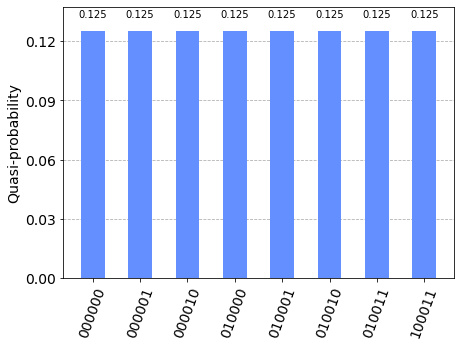

In [8]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

$\phi=(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2) \wedge \neg x_3$. The output is represented in the qubit $q_5$ indicating by the value $1$ the presence of the  solution. The solution is indicated in  the qubits $q_0=1$, $q_1=1$ and $q_4=0$ by the right column representing the state $|q_5q_4q_3q_2q_1q_0\rangle=|100011\rangle$

## Grover's Amplification

In the next step we apply the Grover’s algorithm with two rotations

In [9]:
qc = QuantumCircuit(6,3)

#Input 0,1,4
qc.h(0)
qc.h(1)
qc.h(4)
#Preparation of Aux
qc.x(5)
qc.h(5)
qc.barrier()

#First And 2 is zero
qc.ccx(0,1,2)
qc.barrier()
#Result in 2

#If AND IF

qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.ccx(0,1,2)

qc.barrier()
#Preparation of Aux
qc.h(5)
#Diffusor
qc.barrier()
qc.h([0,1,4])
qc.x([0,1,4])
qc.h(0)
qc.ccx(1,4,0)
qc.h(0)
qc.barrier()
qc.x([0,1,4])
qc.h([0,1,4])


#Second Iteration

#Preparation of Aux
qc.barrier()
qc.barrier()
qc.h(5)
qc.barrier()

#First And 2 is zero
qc.ccx(0,1,2)
qc.barrier()
#Result in 2

#If AND IF

qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.ccx(0,1,2)

qc.barrier()
#Preparation of Aux
qc.h(5)
#Diffusor
qc.barrier()
qc.h([0,1,4])
qc.x([0,1,4])
qc.h(0)
qc.ccx(1,4,0)
qc.h(0)
qc.barrier()
qc.x([0,1,4])
qc.h([0,1,4])

qc.measure(0,0)
qc.measure(1,1)
qc.measure(4,2)

qc.draw(fold=165)

┌───┐      ░       ░                      ░            ░       ░            ░                 ░       ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐ ░  ░ »
q_0: ┤ H ├──────░───■───░────────■─────────────░────────────░───────░────────────░────────■────────░───■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─░──░─»
     ├───┤      ░   │   ░      ┌─┴─┐┌───┐      ░            ░       ░            ░ ┌───┐┌─┴─┐      ░   │   ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤ ░  ░ »
q_1: ┤ H ├──────░───■───░──────┤ X ├┤ X ├──■───░────────────░───────░───■────────░─┤ X ├┤ X ├──────░───■───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░──░─»
     └───┘      ░ ┌─┴─┐ ░      └─┬─┘└───┘  │   ░            ░       ░   │        ░ └───┘└─┬─┘      ░ ┌─┴─┐ ░       ░ └───┘└───┘       │        ░ └───┘└───┘ ░  ░ »
q_2: ───────────░─┤ X ├─░────────┼─────────■───░────────────░───────░───■────────░────────┼────────░─┤ X ├─░───────░──────────────────┼────────░────────────░──░─»
                ░ └───┘ ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░       ░ ┌─┴─┐┌───┐ ░        │  ┌───┐ ░ └───┘ ░       ░                  │        ░            ░  ░ »
q_3: ───────────░───────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░───────░─┤ X ├┤ X ├─░────────■──┤ X ├─░───────░───────░──────────────────┼────────░────────────░──░─»
     ┌───┐      ░       ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░ ┌───┐ ░ └───┘└───┘ ░           └───┘ ░       ░       ░ ┌───┐┌───┐       │        ░ ┌───┐┌───┐ ░  ░ »
q_4: ┤ H ├──────░───────░──────────────────────░─┤ X ├──■───░─┤ X ├─░────────────░─────────────────░───────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░──░─»
     ├───┤┌───┐ ░       ░                      ░ └───┘┌─┴─┐ ░ └───┘ ░            ░                 ░       ░ ┌───┐ ░ └───┘└───┘                ░ └───┘└───┘ ░  ░ »
q_5: ┤ X ├┤ H ├─░───────░──────────────────────░──────┤ X ├─░───────░────────────░─────────────────░───────░─┤ H ├─░───────────────────────────░────────────░──░─»
     └───┘└───┘ ░       ░                      ░      └───┘ ░       ░            ░                 ░       ░ └───┘ ░                           ░            ░  ░ »
c: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                                                                                 »
«           ░       ░                      ░            ░       ░            ░                 ░       ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐┌─┐      
«q_0: ──────░───■───░────────■─────────────░────────────░───────░────────────░────────■────────░───■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├┤M├──────
«           ░   │   ░      ┌─┴─┐┌───┐      ░            ░       ░            ░ ┌───┐┌─┴─┐      ░   │   ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤└╥┘┌─┐   
«q_1: ──────░───■───░──────┤ X ├┤ X ├──■───░────────────░───────░───■────────░─┤ X ├┤ X ├──────░───■───░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─╫─┤M├───
«           ░ ┌─┴─┐ ░      └─┬─┘└───┘  │   ░            ░       ░   │        ░ └───┘└─┬─┘      ░ ┌─┴─┐ ░       ░ └───┘└───┘       │        ░ └───┘└───┘ ║ └╥┘   
«q_2: ──────░─┤ X ├─░────────┼─────────■───░────────────░───────░───■────────░────────┼────────░─┤ X ├─░───────░──────────────────┼────────░────────────╫──╫────
«           ░ └───┘ ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░       ░ ┌─┴─┐┌───┐ ░        │  ┌───┐ ░ └───┘ ░       ░                  │        ░            ║  ║    
«q_3: ──────░───────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░───────░─┤ X ├┤ X ├─░────────■──┤ X ├─░───────░───────░──────────────────┼────────░────────────╫──╫────
«           ░       ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░ ┌───┐ ░ └───┘└───┘ ░           └───┘ ░       ░       ░ ┌───┐┌───┐       │        ░ ┌───┐┌───┐ ║  ║ ┌─┐
«q_4: ──────░───────░──────────────────────░─┤ X ├──■───░─┤ X ├─░────────────░─────────────────░───────░───────

$\phi=(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2) \wedge \neg x_3$ and two rotations of Grover's algorithm. The input are the qubits $0$, $1$ and $4$ is mapped in superposition by  Hadamard  gates.  The rotations itself are separated by two $qc.barrier()$ commands. 
We could as well simplify the circuit by eliminating the two Hadamard  gates of  the auxiliary qubit after the first  and second rotation, however by doing so the circuit loses its modular structure  (less readable) and the redundant operations are simplified during the transpiration process.
The qubits $0$, $1$ and $4$ are measured.


Total count are: {'011': 957, '111': 10, '110': 4, '100': 5, '001': 5, '010': 12, '000': 3, '101': 4}


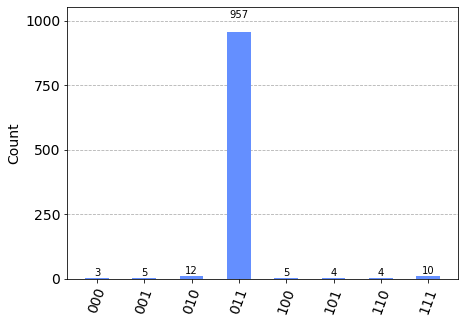

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The  qubits $0$, $1$ and $4$ indicate the eight possible instantiations for $x_1$, $x_2$ and $x_3$ for the $\phi=(x_1 \leftrightarrow x_2) \wedge ( x_1 \wedge x_2) \wedge \neg x_3$ SAT problem. The  solution after two rotations for the SAT problem has the highest count with the measured state $|011 \rangle$.

## No Solution

For the Boolean formula 
\begin{equation}
\phi=(x_1 \leftrightarrow x_2) \wedge ( \neg x_1 \wedge x_2) \wedge \neg x_3
\end{equation}
no solution exists, the formula can never evaluate to the value true.

In [11]:
qc = QuantumCircuit(6,3)

#Input 0,1,4
qc.h(0)
qc.h(1)
qc.h(4)
#Preparation of Aux
qc.x(5)
qc.h(5)
qc.barrier()

#First And 2 is zero
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.barrier()
#Result in 2

#If AND IF

qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)

qc.barrier()
#Preparation of Aux
qc.h(5)
#Diffusor
qc.barrier()
qc.h([0,1,4])
qc.x([0,1,4])
qc.h(0)
qc.ccx(1,4,0)
qc.h(0)
qc.barrier()
qc.x([0,1,4])
qc.h([0,1,4])

qc.measure(0,0)
qc.measure(1,1)
qc.measure(4,2)

qc.draw(fold=100)

┌───┐      ░ ┌───┐     ┌───┐ ░                      ░            ░       ░            ░      »
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░────────■─────────────░────────────░───────░────────────░──────»
     ├───┤      ░ └───┘  │  └───┘ ░      ┌─┴─┐┌───┐      ░            ░       ░            ░ ┌───┐»
q_1: ┤ H ├──────░────────■────────░──────┤ X ├┤ X ├──■───░────────────░───────░───■────────░─┤ X ├»
     └───┘      ░      ┌─┴─┐      ░      └─┬─┘└───┘  │   ░            ░       ░   │        ░ └───┘»
q_2: ───────────░──────┤ X ├──────░────────┼─────────■───░────────────░───────░───■────────░──────»
                ░      └───┘      ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░       ░ ┌─┴─┐┌───┐ ░      »
q_3: ───────────░─────────────────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░───────░─┤ X ├┤ X ├─░──────»
     ┌───┐      ░                 ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░ ┌───┐ ░ └───┘└───┘ ░      »
q_4: ┤ H ├──────░─────────────────░──────────────────────░─┤ X ├──■───░─┤ X ├─░────────────░──────»
     ├───┤┌───┐ ░                 ░                      ░ └───┘┌─┴─┐ ░ └───┘ ░            ░      »
q_5: ┤ X ├┤ H ├─░─────────────────░──────────────────────░──────┤ X ├─░───────░────────────░──────»
     └───┘└───┘ ░                 ░                      ░      └───┘ ░       ░            ░      »
c: 3/═════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                  »
«                ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐┌─┐      
«q_0: ──■────────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├┤M├──────
«     ┌─┴─┐      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤└╥┘┌─┐   
«q_1: ┤ X ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─╫─┤M├───
«     └─┬─┘      ░      ┌─┴─┐      ░       ░ └───┘└───┘       │        ░ └───┘└───┘ ║ └╥┘   
«q_2: ──┼────────░──────┤ X ├──────░───────░──────────────────┼────────░────────────╫──╫────
«       │  ┌───┐ ░      └───┘      ░       ░                  │        ░            ║  ║    
«q_3: ──■──┤ X ├─░─────────────────░───────░──────────────────┼────────░────────────╫──╫────
«          └───┘ ░                 ░       ░ ┌───┐┌───┐       │        ░ ┌───┐┌───┐ ║  ║ ┌─┐
«q_4: ───────────░─────────────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─╫──╫─┤M├
«                ░                 ░ ┌───┐ ░ └───┘└───┘                ░ └───┘└───┘ ║  ║ └╥┘
«q_5: ───────────░─────────────────░─┤ H ├─░───────────────────────────░────────────╫──╫──╫─
«                ░                 ░ └───┘ ░                           ░            ║  ║  ║ 
«c: 3/══════════════════════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                                   0  1  2


Total count are: {'011': 113, '111': 131, '101': 109, '000': 141, '010': 135, '001': 129, '100': 133, '110': 109}


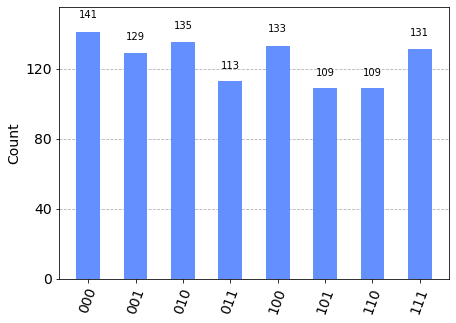

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

For the Boolean formula $\phi=(x_1 \leftrightarrow x_2) \wedge ( \neg x_1 \wedge x_2) \wedge \neg x_3$ no solution exists. The  qubits $0$, $1$ and $4$ indicate the eight possible instantiations for $x_1$, $x_2$ and $x_3$. (a) The distribution of the eight possible instantiations for $x_1$, $x_2$ and $x_3$ after one rotation

In [13]:
qc = QuantumCircuit(6,3)

#Input 0,1,4
qc.h(0)
qc.h(1)
qc.h(4)
#Preparation of Aux
qc.x(5)
qc.h(5)
qc.barrier()

#First And 2 is zero
qc.x(0)
qc.ccx(0,1,2)
qc.barrier()
qc.x(0)
#Result in 2

#If AND IF

qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)

qc.barrier()
#Preparation of Aux
qc.h(5)
#Diffusor
qc.barrier()
qc.h([0,1,4])
qc.x([0,1,4])
qc.h(0)
qc.ccx(1,4,0)
qc.h(0)
qc.barrier()
qc.x([0,1,4])
qc.h([0,1,4])


#Second Iteration

#Preparation of Aux
qc.barrier()
qc.h(5)
qc.barrier()

#First And 2 is zero
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)
qc.barrier()
#Result in 2

#If AND IF

qc.x(3)
qc.ccx(3,0,1)
qc.x(1)
#Result in 1

#Make 3 zero
qc.x(3)
qc.ccx(1,2,3)
qc.barrier()
#Result in 3

#Input 4
qc.x(4)
qc.ccx(3,4,5)

#Un-compute
qc.barrier()
qc.x(4)
qc.barrier()
qc.ccx(1,2,3)
qc.x(3)
qc.barrier()
qc.x(1)
qc.ccx(3,0,1)
qc.x(3)
qc.barrier()
qc.x(0)
qc.ccx(0,1,2)
qc.x(0)

qc.barrier()
#Preparation of Aux
qc.h(5)
#Diffusor
qc.barrier()
qc.h([0,1,4])
qc.x([0,1,4])
qc.h(0)
qc.ccx(1,4,0)
qc.h(0)
qc.barrier()
qc.x([0,1,4])
qc.h([0,1,4])

qc.measure(0,0)
qc.measure(1,1)
qc.measure(4,2)


qc.draw(fold=100)

┌───┐      ░ ┌───┐      ░ ┌───┐                ░            ░       ░            ░           »
q_0: ┤ H ├──────░─┤ X ├──■───░─┤ X ├──■─────────────░────────────░───────░────────────░────────■──»
     ├───┤      ░ └───┘  │   ░ └───┘┌─┴─┐┌───┐      ░            ░       ░            ░ ┌───┐┌─┴─┐»
q_1: ┤ H ├──────░────────■───░──────┤ X ├┤ X ├──■───░────────────░───────░───■────────░─┤ X ├┤ X ├»
     └───┘      ░      ┌─┴─┐ ░      └─┬─┘└───┘  │   ░            ░       ░   │        ░ └───┘└─┬─┘»
q_2: ───────────░──────┤ X ├─░────────┼─────────■───░────────────░───────░───■────────░────────┼──»
                ░      └───┘ ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░       ░ ┌─┴─┐┌───┐ ░        │  »
q_3: ───────────░────────────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░───────░─┤ X ├┤ X ├─░────────■──»
     ┌───┐      ░            ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░ ┌───┐ ░ └───┘└───┘ ░           »
q_4: ┤ H ├──────░────────────░──────────────────────░─┤ X ├──■───░─┤ X ├─░────────────░───────────»
     ├───┤┌───┐ ░            ░                      ░ └───┘┌─┴─┐ ░ └───┘ ░            ░           »
q_5: ┤ X ├┤ H ├─░────────────░──────────────────────░──────┤ X ├─░───────░────────────░───────────»
     └───┘└───┘ ░            ░                      ░      └───┘ ░       ░            ░           »
c: 3/═════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                  »
«           ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐ ░       ░ ┌───┐     »
«q_0: ──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─░───────░─┤ X ├──■──»
«           ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤ ░       ░ └───┘  │  »
«q_1: ──────░────────■────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░───────░────────■──»
«           ░      ┌─┴─┐      ░       ░ └───┘└───┘       │        ░ └───┘└───┘ ░       ░      ┌─┴─┐»
«q_2: ──────░──────┤ X ├──────░───────░──────────────────┼────────░────────────░───────░──────┤ X ├»
«     ┌───┐ ░      └───┘      ░       ░                  │        ░            ░       ░      └───┘»
«q_3: ┤ X ├─░─────────────────░───────░──────────────────┼────────░────────────░───────░───────────»
«     └───┘ ░                 ░       ░ ┌───┐┌───┐       │        ░ ┌───┐┌───┐ ░       ░           »
«q_4: ──────░─────────────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░───────░───────────»
«           ░                 ░ ┌───┐ ░ └───┘└───┘                ░ └───┘└───┘ ░ ┌───┐ ░           »
«q_5: ──────░─────────────────░─┤ H ├─░───────────────────────────░────────────░─┤ H ├─░───────────»
«           ░                 ░ └───┘ ░                           ░            ░ └───┘ ░           »
«c: 3/═════════════════════════════════════════════════════════════════════════════════════════════»
«                                                                                                  »
«     ┌───┐ ░                      ░            ░       ░            ░                 ░ ┌───┐     »
«q_0: ┤ X ├─░────────■─────────────░────────────░───────░────────────░────────■────────░─┤ X ├──■──»
«     └───┘ ░      ┌─┴─┐┌───┐      ░            ░       ░            ░ ┌───┐┌─┴─┐      ░ └───┘  │  »
«q_1: ──────░──────┤ X ├┤ X ├──■───░────────────░───────░───■────────░─┤ X ├┤ X ├──────░────────■──»
«           ░      └─┬─┘└───┘  │   ░            ░       ░   │        ░ └───┘└─┬─┘      ░      ┌─┴─┐»
«q_2: ──────░────────┼─────────■───░────────────░───────░───■────────░────────┼────────░──────┤ X ├»
«           ░ ┌───┐  │  ┌───┐┌─┴─┐ ░            ░       ░ ┌─┴─┐┌───┐ ░        │  ┌───┐ ░      └───┘»
«q_3: ──────░─┤ X ├──■──┤ X ├┤ X ├─░────────■───░───────░─┤ X ├┤ X ├─░────────■──┤ X ├─░───────────»
«           ░ └───┘     └───┘└───┘ ░ ┌───┐  │   ░ ┌───┐ ░ └───┘└───┘ ░           └───┘ ░           »
«q_4: ──────░──────────────────────░─┤ X ├──■───░─┤ X ├─░────────────░───────────


Total count are: {'000': 116, '010': 125, '001': 131, '100': 131, '110': 124, '101': 124, '011': 121, '111': 128}


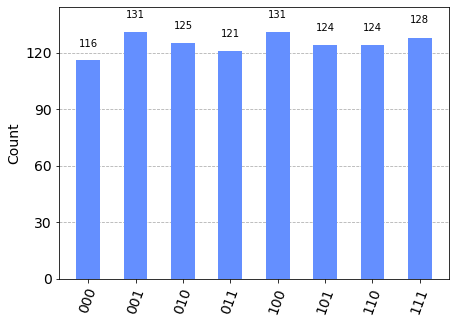

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The distribution  after two rotations. Each  instantiation has nearly the same count, no solution exists.